In [ ]:
#Manuel Alejandro Polo González
#David Sáenz Lancheros

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [52]:
plt.rcParams['text.usetex'] = True

In [53]:
data= np.genfromtxt("datos-carro-1d.csv",dtype=float,skip_header=5,missing_values=np.nan,delimiter=",")
def test(t,a,b,c):
    return a+b*t+(c/2)*t**2
mov=data[0:,1]>=0.001
fit=data[mov]
print("El tiempo t0 es:",f"{np.amin(fit[0:,0])} segundos")
t=fit[:,0]
x=fit[:,1]

El tiempo t0 es: 1.066656 segundos


Se selecciono el t0 como 1.066s. Consecuente, el ajuste lineal.

In [54]:
param, paramcov = curve_fit(test, t, x)
print("Parametros del ajuste:\n",f"ax={param[2]:.6f}\u00B1{paramcov[2,2]:.6f}\n"
      ,f"vx={param[1]:.5f}\u00B1{paramcov[1,1]:.5f}\n",f"x0={param[0]:.6f}\u00B1{paramcov[0,0]:.6f}")
yfit=(param[0]+param[1]*t+(param[2]/2)*t**2)
#Calcular el promedio de ax de la tabla de datos, y comparar porcentualmente.
ax=np.mean(fit[:50,5]) #Aqui se selecciona hasta la fila 50, para evitar los nan de las ultimas dos filas, y se calcula el promedio de los valores.
print(f"Aceleracion obtenida de la tabla: {ax:.6f}")
er=((ax-param[2])/param[2])*100
print(f"El error porcentual es de: {er:.4f}")

Parametros del ajuste:
 ax=0.708962±0.000003
 vx=-0.69885±0.00001
 x0=0.340568±0.000008
Aceleracion obtenida de la tabla: 0.712225
El error porcentual es de: 0.4603


Graficar

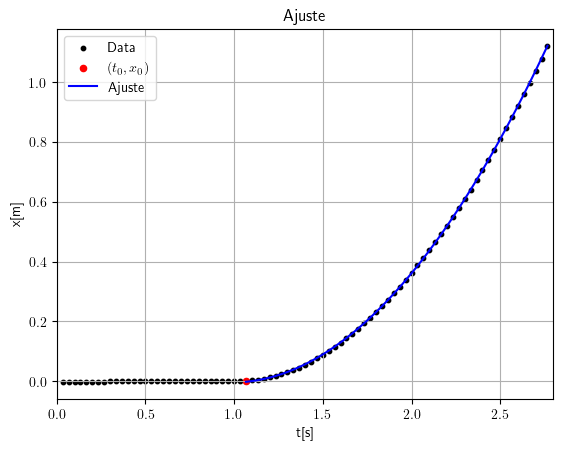

In [55]:
plt.figure()
plt.grid(True)
plt.scatter(data[:,0],data[:,1],c="k",s=10,label='Data')
plt.scatter(min(t),min(x),c="r",s=20,label=r"$(t_0,x_0)$")
plt.plot(t,yfit,c="b",label=r"Ajuste")
plt.xlabel(r"t[s]")
plt.xlim((0,max(data[:,0])+0.03))
plt.ylabel(r"x[m]")
plt.legend(loc="upper left")
plt.title(r"Ajuste")
plt.show()